In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [129]:
df = pd.read_csv("penguin.csv")

In [130]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Chinstrap,Torgersen,35.8,13.3,228.0,5550,MALE
1,Adelie,Biscoe,35.9,17.5,211.7,6012,MALE
2,Adelie,Torgersen,47.4,19.0,190.8,5305,MALE
3,Gentoo,Biscoe,46.7,18.1,185.1,3611,MALE
4,Adelie,Biscoe,54.7,15.0,196.3,4208,FEMALE


## EDA & Data Cleaning

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            300 non-null    object 
 1   island             300 non-null    object 
 2   culmen_length_mm   300 non-null    float64
 3   culmen_depth_mm    300 non-null    float64
 4   flipper_length_mm  300 non-null    float64
 5   body_mass_g        300 non-null    int64  
 6   sex                300 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 16.5+ KB


In [132]:
df.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [133]:
df["sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [134]:
for col in df:
    print(df[col].unique())

['Chinstrap' 'Adelie' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
[35.8 35.9 47.4 46.7 54.7 53.1 58.4 58.9 36.9 59.  38.5 53.  54.3 58.1
 37.6 51.5 44.6 36.6 58.2 45.8 54.1 37.8 39.2 35.6 34.4 44.9 39.3 49.7
 42.3 53.2 54.8 41.2 48.6 48.9 57.3 42.  49.3 33.2 50.6 49.2 38.7 41.9
 42.2 32.1 55.7 35.2 45.  39.4 34.8 40.3 39.9 38.  54.5 57.2 33.7 43.5
 47.2 45.9 34.3 51.4 38.4 56.  52.8 36.1 44.7 47.  57.8 35.7 52.7 36.8
 49.4 42.5 47.7 50.8 38.3 45.3 33.5 36.4 33.6 34.9 38.8 54.6 55.2 33.8
 42.9 50.3 34.5 41.  36.7 55.6 57.  53.4 35.1 43.8 56.8 40.9 48.5 44.
 45.4 50.2 43.2 38.6 42.7 39.6 55.3 42.1 35.  45.7 40.7 51.3 53.7 47.1
 44.2 42.4 58.6 40.8 56.1 35.5 44.3 56.2 39.1 41.7 53.8 34.1 48.2 45.5
 50.  54.2 58.5 34.6 52.4 40.4 43.9 42.8 51.7 41.5 50.9 40.1 46.5 55.8
 33.9 38.2 51.6 54.  48.7 52.9 37.3 40.6 43.6 49.5 54.4 39.7 36.  33.1
 51.2 46.  50.1 53.3 41.8 46.6 55.1 51.  58.8 48.  45.6 54.9 55.9 46.1
 49.  40.  46.4 41.6 32.3 57.6 58.  57.1 51.1 40.2 58.7 37.5 57.9 41.3
 46.3 44.8]
[13

In [135]:
pd.concat({"Unique values" : df.apply(pd.unique),"Num" : df.nunique()},axis= 1)

,Unique values,Num
species,"[Chinstrap, Adelie, Gentoo]",3
island,"[Torgersen, Biscoe, Dream]",3
culmen_length_mm,"[35.8, 35.9, 47.4, 46.7, 54.7, 53.1, 58.4, 58....",184
culmen_depth_mm,"[13.3, 17.5, 19.0, 18.1, 15.0, 18.3, 17.6, 18....",83
flipper_length_mm,"[228.0, 211.7, 190.8, 185.1, 196.3, 188.3, 207...",246
body_mass_g,"[5550, 6012, 5305, 3611, 4208, 4490, 3623, 611...",285
sex,"[MALE, FEMALE]",2


[Text(0, 0, '75'), Text(0, 0, '104'), Text(0, 0, '121')]

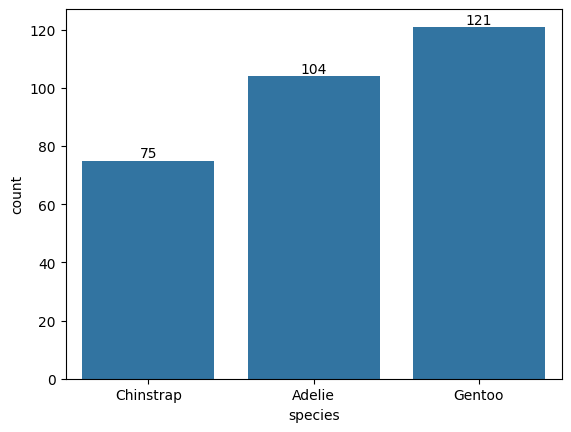

In [136]:
ax = sbn.countplot(x="species",data=df)
ax.bar_label(ax.containers[0])

[Text(0, 0, '106'), Text(0, 0, '97'), Text(0, 0, '97')]

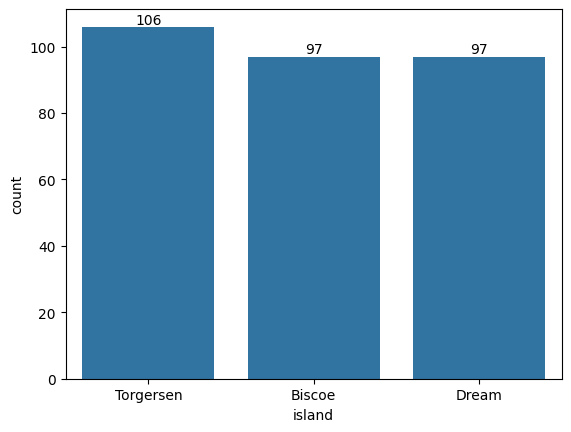

In [137]:
ax = sbn.countplot(x="island",data=df)
ax.bar_label(ax.containers[0])

In [138]:
df.corr(numeric_only=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,0.078423,0.050403,0.114856
culmen_depth_mm,0.078423,1.000000,-0.026077,-0.006598
flipper_length_mm,0.050403,-0.026077,1.000000,0.036364
body_mass_g,0.114856,-0.006598,0.036364,1.000000


<Axes: >

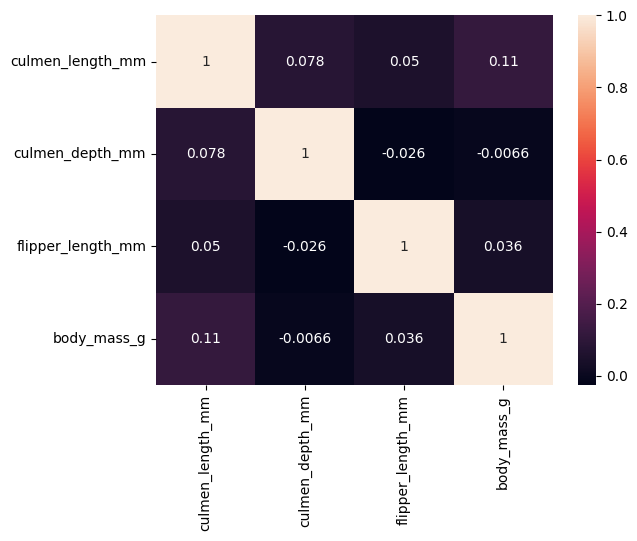

In [139]:
sbn.heatmap(df.corr(numeric_only=True),annot=True)

In [140]:
X = pd.get_dummies(df.drop("species",axis=1),drop_first=True)
y = df["species"]

## Train Test Split

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=9)

## Hyperparameters & Random Forest

In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [144]:
n_est = [9,32,64,128]
max_feat = [1,2,3,4]
bootstrap_sec = [True,False]
oob = [True,False]

In [145]:
parameters = {
    "n_estimators" : n_est,
    "max_features" : max_feat,
    "bootstrap"     : bootstrap_sec,
    "oob_score"    : oob
}

In [146]:
random_forest = RandomForestClassifier(random_state=9)
grid = GridSearchCV(random_forest,parameters)

In [147]:
grid.fit(X_train,y_train)

/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/berkayates/Desktop/MLearning & MyProjects /myproenv/lib/python3.13/site-packages/sklearn/ensemble/_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to 

GridSearchCV(estimator=RandomForestClassifier(random_state=9),
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 3, 4],
                         'n_estimators': [9, 32, 64, 128],
                         'oob_score': [True, False]})

In [148]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, max_features=1, n_estimators=128,
                       random_state=9)

In [149]:
pengu_pred = grid.predict(X_test)

## Model Evaluation

In [150]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [151]:
accuracy_score(pengu_pred,y_test)

0.5111111111111111

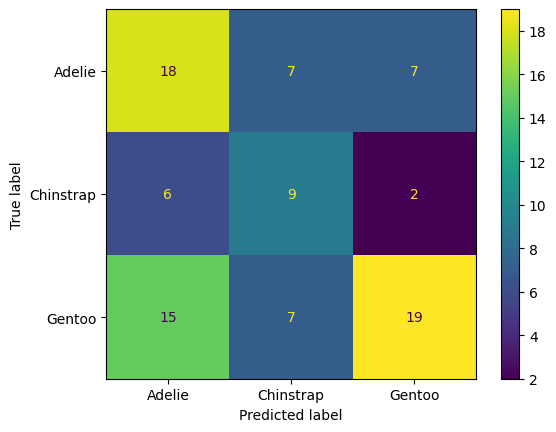

In [152]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)

In [153]:
print(classification_report(y_test,pengu_pred))

              precision    recall  f1-score   support

      Adelie       0.46      0.56      0.51        32
   Chinstrap       0.39      0.53      0.45        17
      Gentoo       0.68      0.46      0.55        41

    accuracy                           0.51        90
   macro avg       0.51      0.52      0.50        90
weighted avg       0.55      0.51      0.52        90



<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

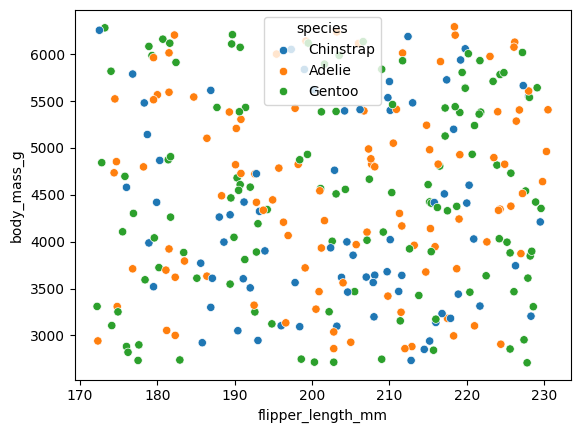

In [154]:
sbn.scatterplot(x="flipper_length_mm",y="body_mass_g",hue="species",data = df)

## Elbow Plot

In [155]:
error_rate = []
wrong_dec = []

for n in range(1, 200):
    rand_forest_class = RandomForestClassifier(n_estimators=n, 
                                               bootstrap=True, max_features=2)
    rand_forest_class.fit(X_train, y_train)
    pengu_preds = rand_forest_class.predict(X_test)
    error = 1 - accuracy_score(pengu_preds, y_test)

    sample = y_test.to_numpy()
    sample = sample.reshape(1, -1)[0]

    n_missed = np.sum(pengu_preds != sample)
    error_rate.append(error)
    wrong_dec.append(n_missed)


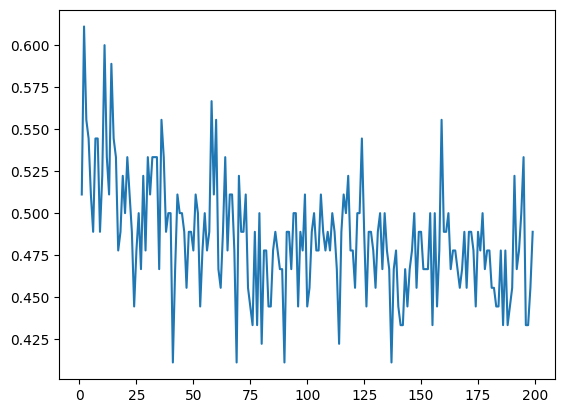

In [156]:
plt.plot(range(1,200),error_rate)

(10.0, 20.0)

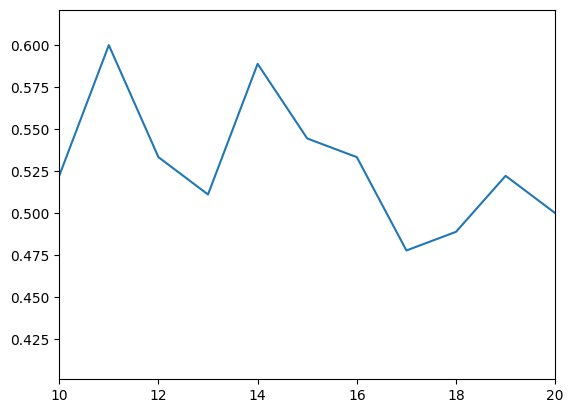

In [157]:
plt.plot(range(1,200),error_rate)
plt.xlim(10,20)

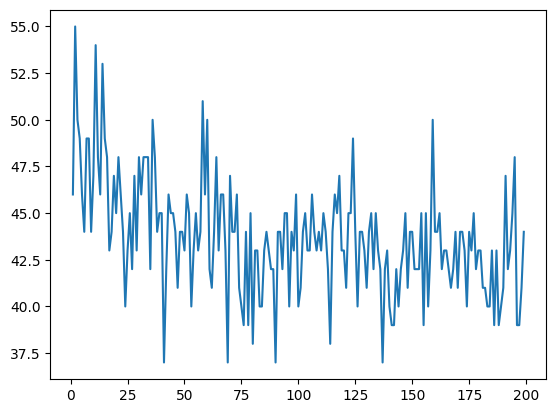

In [158]:
plt.plot(range(1,200),wrong_dec)